In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib
from matplotlib import animation, rc
rc('animation', html='jshtml')
from matplotlib import cm
from scipy.spatial import distance
from itertools import permutations
import random as random

In [400]:
class SimulatedAnnealing:
    """
    A class for computing simmulated annealing in the case
    where the cost function is 1-Dimensional and 
    defined on a continuous bounded interval
    """
    def __init__(self,cost_func,t_0,N_max,bounds,init_state = None):
 
        self.cost_func   = cost_func
        self.t_0	     = t_0
        self.N_max 	     = N_max
        self.bounds      = bounds
        
        if init_state:
            self.best_state = init_state
        else:
            self.best_state = self.initial_state()

        self.best_energy = cost_func(self.best_state)
        self.current_t      = self.t_0
        self.current_state  = self.best_state
        self.current_energy = cost_func(self.current_state)
        self.history        = []        

    def initial_state(self):
        """
        A method for generating
        a random starting point 
        withing the given bounds

        """
        return self.bounds[0]+np.random.rand()* \
               (self.bounds[1]-self.bounds[0])

    def annealing_schedule(self,method,index=1):
        """
        A schedule for updating the
        the temperature at each iteration
        """
        if method == 'exponential schedule':
            self.current_t *= 1.0/2.0
        if method == 'logarithmic schedule':
            self.current_t  = np.log(2.0)/np.log(index+1)
        if method == 'fast annealing':
            self.current_t  = self.t_0/(index)

    def neighbour(self):
        """
        A method for randomly choosing a
        neighbour of the current state
        within some distance
        """
        ## Neighbour radius = 10 % of distance between bounds ##
        factor = 0.3 
        radius = factor*(self.bounds[1]-self.bounds[0])

        low_lim, upper_lim = self.current_state-radius, self.current_state+radius
        if low_lim <= self.bounds[0] or upper_lim >= self.bounds[1]:
            while low_lim <= self.bounds[0] or upper_lim >= self.bounds[1]:
                factor *= 0.5 
                radius = factor*(self.bounds[1]-self.bounds[0])
                low_lim, upper_lim = self.current_state-radius, self.current_state+radius

        ## Setting to random in accepted lim ##
        neighbour = random.uniform(low_lim,upper_lim)

        ## Converging to edge -> reset to center ##
        center = self.bounds[0]+0.5*(self.bounds[1]-self.bounds[0])
        if np.abs(neighbour-self.bounds[0]) < (self.bounds[1]-self.bounds[0])/100:
            neighbour = center
        if np.abs(neighbour-self.bounds[1]) < (self.bounds[1]-self.bounds[0])/100:
            neighbour = center
        
        #mu    = self.current_state                 # mean 
        #sigma = (self.bounds[1]-self.bounds[0])/20 # standard deviation
        #neighbour = np.random.normal(mu, sigma, 1)[0]

        return neighbour
    
    def probability(self,diff):
        """
        A method for calculating
        the acceptance probability
        for a given difference and temperature
        """
        return np.exp(-(diff/self.current_t))
    
    def simulate(self):
        """
        A method for running the Simmulated Annealing 
        algorithm
        """
        self.history.append([self.current_state,self.best_state])
        for i in range(1,self.N_max+1):
            self.annealing_schedule(method='fast annealing',index=i)
            neighbour_state  = self.neighbour()
            neighbour_energy = self.cost_func(neighbour_state)
            energy_diff      = neighbour_energy - self.current_energy
            rand   			 = np.random.rand()

            if energy_diff <= 0.0 or rand < self.probability(energy_diff):
                self.current_state  = neighbour_state
                self.current_energy = neighbour_energy
                
            if neighbour_energy < self.best_energy:
                self.best_state     = neighbour_state
                self.best_energy    = neighbour_energy
                self.best_energy_it = i

            self.history.append([self.current_state,self.best_state])
            
        print(f'self.best_energy_it:',self.best_energy_it)
            


self.best_energy_it: 23


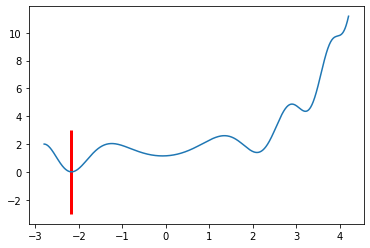

In [409]:
def objective_func(x):
    return 1+np.sin(np.power(x,2))+np.exp(x)/6

t_0 = 10
N_max = 30
bounds = np.array([-2.8,4])
test = SimulatedAnnealing(objective_func,t_0,N_max,bounds)
test.simulate()
plt.vlines(test.best_state,-3,3,color='r',lw=3)
xs = np.linspace(-2.8,4.2,1000)
plt.plot(xs,objective_func(xs))

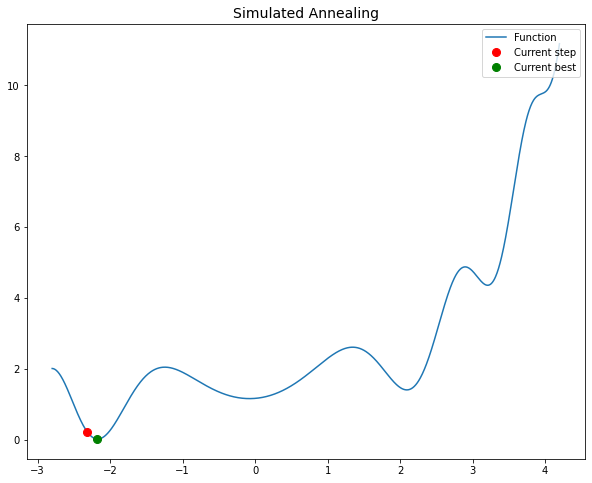

In [410]:
## Plotting ##
fig, ax = plt.subplots(1,1,figsize = (10,8))

ax.set_title('Simulated Annealing',size=14)
ax.plot(xs,objective_func(xs),label = 'Function')

steps, = ax.plot([],[],'ro',ms=8,label='Current step')
bests, = ax.plot([],[],'go',ms=8,label='Current best')

def update(i):
    steps.set_data(test.history[i][0],objective_func(test.history[i][0]))
    bests.set_data(test.history[i][1],objective_func(test.history[i][1]))

    return steps, bests,
ax.legend(loc = 'upper right')


anim = animation.FuncAnimation(fig,
                               update,
                               frames=len(test.history),
                               interval=150,
                               blit=True,
                               repeat_delay=100)

## Uncomment below to save gif ##
#anim.save("TravelingSalesmanBruteforce2.gif", dpi=100, writer=animation.PillowWriter(fps=6))

anim